In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('housing.data.txt',header=None,sep='\s+')

df.columns=['CRIM','ZIN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']

In [2]:
df.head()

,CRIM,ZIN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


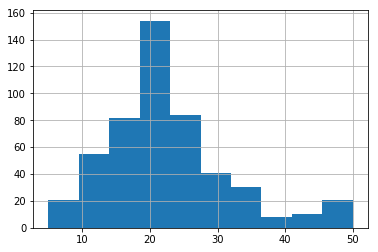

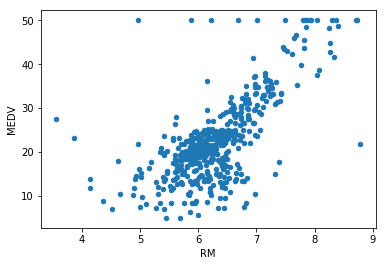

In [3]:
df['MEDV'].hist()
df.plot.scatter(x='RM',y='MEDV')

C:\Users\thinkpad\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


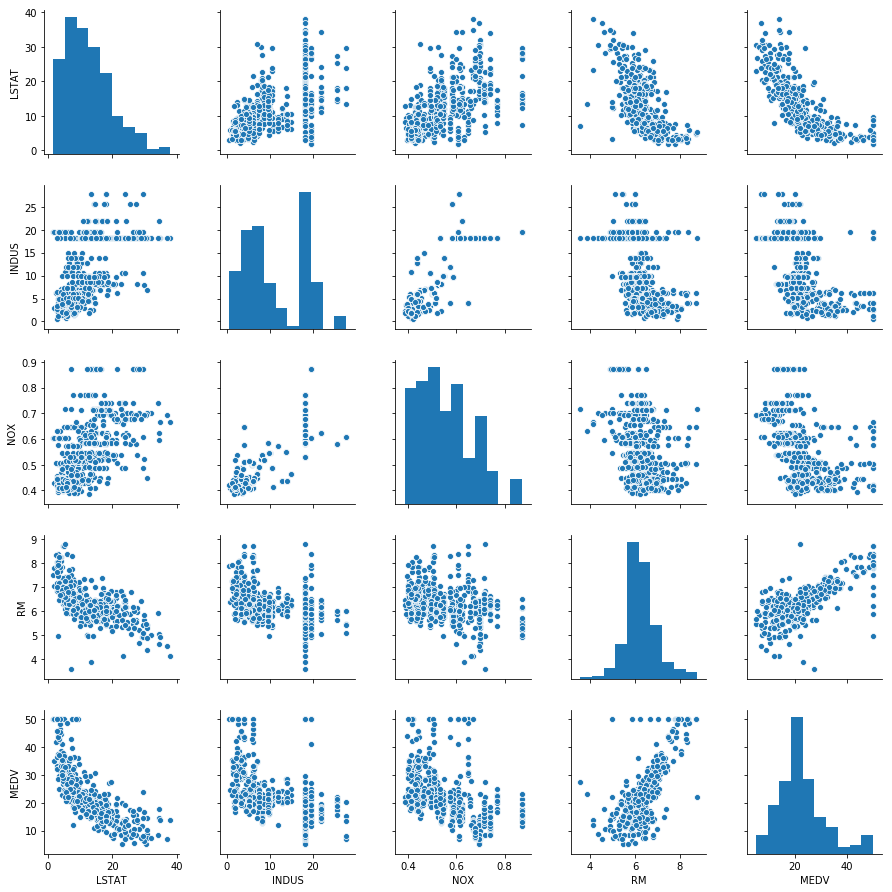

C:\Users\thinkpad\Anaconda3\lib\site-packages\matplotlib\__init__.py:855: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))
C:\Users\thinkpad\Anaconda3\lib\site-packages\matplotlib\__init__.py:846: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 2.2 and will be removed in 3.1.
  "2.2", name=key, obj_type="rcparam", addendum=addendum)


In [4]:
cols1=['LSTAT','INDUS','NOX','RM','MEDV']
sns.pairplot(df[cols1],size=2.5)
plt.tight_layout()
plt.show()
sns.reset_orig()

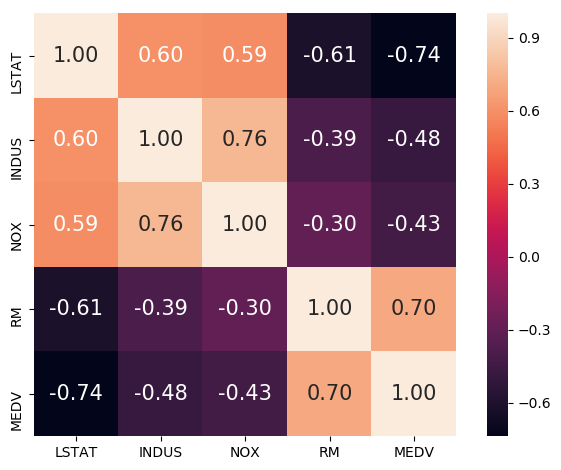

In [5]:
cm=np.corrcoef(df[cols1].values.T)
hm=sns.heatmap(cm,cbar=True,annot=True,square=True,fmt='.2f',annot_kws={'size': 15},yticklabels=cols1,xticklabels=cols1)

plt.tight_layout()
plt.show()

In [6]:
X = df[['RM']].values
y = df['MEDV'].values


In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

sc_x = StandardScaler()
sc_y = StandardScaler()
X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y[:,np.newaxis]).flatten()

### Plotting Linear Regression Model

Slope: 0.695
Intercept: -0.000


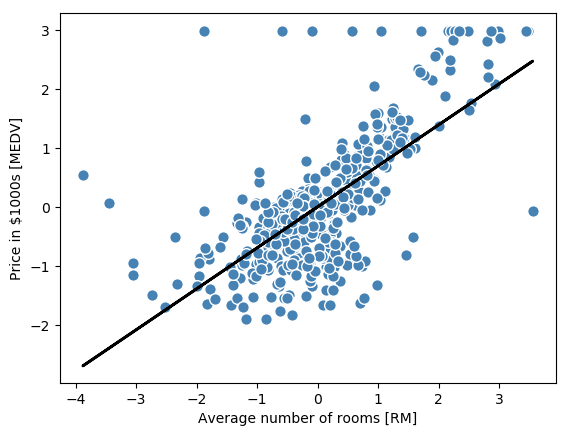

In [8]:
def lin_regplot(X,y,model):
    plt.scatter(X,y,c='steelblue',edgecolor='white',s=70)
    plt.plot(X,model.predict(X),color='black',lw=2)
    return

slr = LinearRegression()
slr.fit(X_std,y_std)
y_pred_std = slr.predict(X_std)
print('Slope: %.3f' % slr.coef_[0])
print('Intercept: %.3f' % slr.intercept_)
lin_regplot(X_std,y_std,slr)
plt.xlabel('Average number of rooms [RM]')
plt.ylabel('Price in $1000s [MEDV]')
plt.show()

### Standardization

Slope: 0.709
Intercept: 0.000


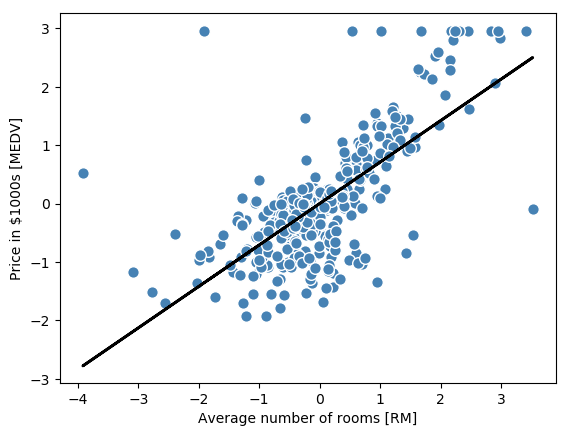

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=0)
RM=np.array(X_train[:,0])
MEDV=np.array(y_train)

sc_x = StandardScaler()
sc_y = StandardScaler()
X_train_std = sc_x.fit_transform(X_train)
y_train_std = sc_y.fit_transform(y_train[:,np.newaxis]).flatten()
X_test_std = sc_x.fit_transform(X_test)
y_test_std = sc_y.fit_transform(y_test[:,np.newaxis]).flatten()

slr = LinearRegression()
slr.fit(X_train_std,y_train_std)
y_train_pred_std = slr.predict(X_train_std)
y_test_pred_std = slr.predict(X_test_std)
print('Slope: %.3f' % slr.coef_[0])
print('Intercept: %.3f' % slr.intercept_)
lin_regplot(X_train_std,y_train_std,slr)
plt.xlabel('Average number of rooms [RM]')
plt.ylabel('Price in $1000s [MEDV]')
plt.show()

### Errors on the splitted DataSet

In [10]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train_std,y_train_pred_std),mean_squared_error(y_test_std,y_test_pred_std)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train_std,y_train_pred_std),r2_score(y_test_std,y_test_pred_std)))


MSE train: 0.497, test: 0.564
R^2 train: 0.503, test: 0.436


### Errors on the entire DataSet

In [11]:
slr.fit(X_std,y_std)
y_pred_std = slr.predict(X_std)

print('MSE : %.3f' % (mean_squared_error(y_std,y_pred_std)))
print('R^2 : %.3f' % (r2_score(y_std,y_pred_std)))

MSE : 0.516
R^2 : 0.484


### Regularization (using Lasso) : Lasso Regression

In [12]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)
print(lasso.coef_)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train,y_train_pred),mean_squared_error(y_test,y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train,y_train_pred),r2_score(y_test,y_test_pred)))
print('Slope: %.3f' % lasso.coef_[0])
print('Intercept: %.3f' % lasso.intercept_)

[9.10783777]
MSE train: 42.178, test: 46.914
R^2 train: 0.502, test: 0.437
Slope: 9.108
Intercept: -34.711
